 # Wine Quality Prediction

In [4]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\user\appdata\local\programs\python\python312\lib\site-packages (1.4.1.post1)




[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [8]:
wine_df = pd.read_csv('winequality-red.csv')

In [9]:
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The data provided appears to be a tabular dataset with 12 columns and multiple rows, where each row represents a sample of wine and each column represents a different feature of that wine. The features are described below:

Fixed acidity: the amount of fixed acids in the wine (g/dm^3)                                    
Volatile acidity: the amount of volatile acids in the wine (g/dm^3)                                   
Citric acid: the amount of citric acid in the wine (g/dm^3)                                           
Residual sugar: the amount of residual sugar in the wine (g/dm^3)                                 
Chlorides: the amount of chlorides in the wine (g/dm^3)                                            
Free sulfur dioxide: the amount of free sulfur dioxide in the wine (mg/dm^3)                         
Total sulfur dioxide: the amount of total sulfur dioxide in the wine (mg/dm^3)                         
Density: the density of the wine (g/cm^3)                                                                                          
pH: the pH level of the wine                                                                                                                        
Sulphates: the amount of sulphates in the wine (g/dm^3)                                                            
Alcohol: the alcohol content of the wine (% vol)                                                    
Quality: a rating of the quality of the wine (scored between 0 and 10)                                           

In [10]:
# checking for missing values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
# checking for missing values
(wine_df < 0).sum().sum()

0

In [12]:
(wine_df < 0).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Analysis and Visulaization

In [13]:
# statistical measures of the dataset
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# number of values for each quality
Overall, this code is useful for visualizing the distribution of the quality variable in the wine_df dataframe.

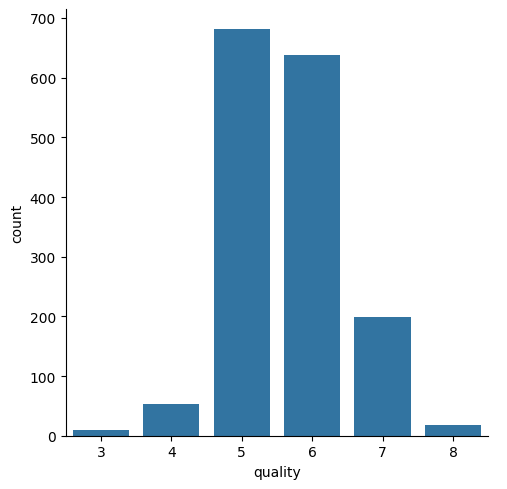

In [14]:
sns.catplot(x='quality',data=wine_df,kind='count')

# volatile acidity vs Quality
A bar plot is a type of plot that shows the relationship between a categorical variable and a continuous variable using bars. In this case, the quality variable is a categorical variable with values ranging from 3 to 9, and the volatile acidity variable is a continuous variable representing the level of volatile acidity in each wine sample.

The height of each bar represents the average volatile acidity level for each quality score. This plot can help us understand the relationship between quality and volatile acidity, and how volatile acidity levels vary across different quality scores.

<Axes: xlabel='quality', ylabel='volatile acidity'>

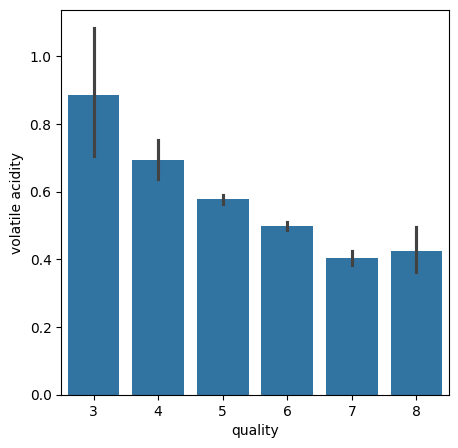

In [15]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_df)

# citric acid vs Quality

<Axes: xlabel='quality', ylabel='citric acid'>

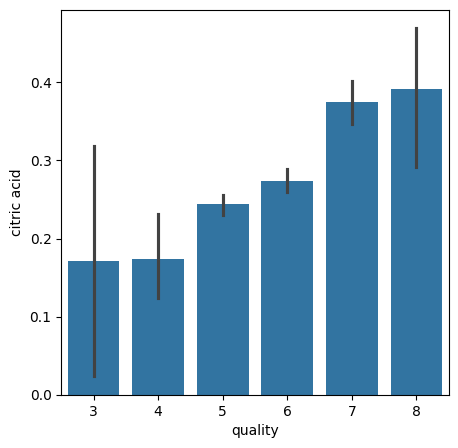

In [16]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_df)

# Correlation                       

In [17]:
correlation = wine_df.corr()

# constructing a heatmap to understand the correlation between the columns

<Axes: >

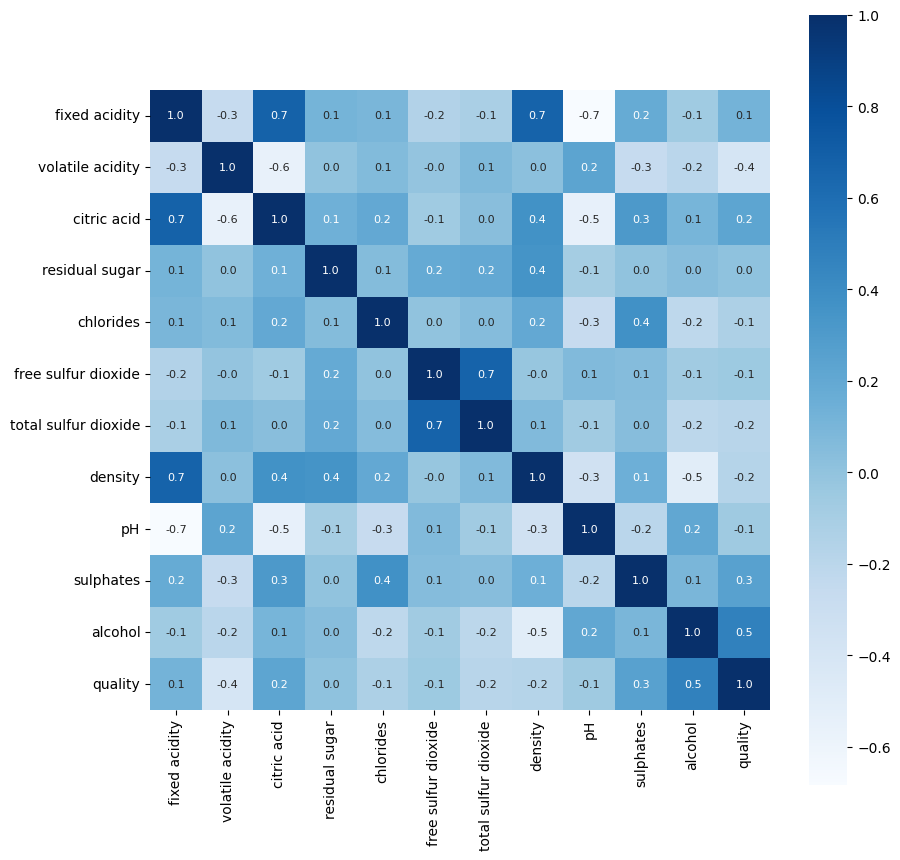

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,square=True,fmt=".1f",annot_kws={"size":8},cmap='Blues')

# separate the data and Label

In [19]:
X = wine_df.drop('quality',axis=1)

In [20]:
y = wine_df['quality'].apply(lambda yval:1 if yval>=7 else 0)

In [21]:
y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

# Train & Test Split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [23]:
print(y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


# Model Training:

# Random Forest Classifier

In [24]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [25]:
RandomForestClassifier()

RandomForestClassifier()

# Model Evaluation

Accuracy Score

In [26]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
print(accuracy_score(X_test_prediction, Y_test))

0.93125


# Building a Predictive System

In [27]:
input_data = (6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6)
np_input_data = np.asarray(input_data)
reshaped_data = np_input_data.reshape(1,-1)
predict = model.predict(reshaped_data)

if predict[0] == 1:
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Good Quality Wine


In [28]:
wine_df.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1458,8.4,0.290,0.40,1.7,0.067,8.0,20.0,0.99603,3.39,0.60,10.5,5
1468,7.3,0.480,0.32,2.1,0.062,31.0,54.0,0.99728,3.30,0.65,10.0,7
93,7.7,0.490,0.26,1.9,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5
532,11.9,0.380,0.49,2.7,0.098,12.0,42.0,1.00040,3.16,0.61,10.3,5
494,6.5,0.390,0.23,8.3,0.051,28.0,91.0,0.99520,3.44,0.55,12.1,6
121,8.8,0.550,0.04,2.2,0.119,14.0,56.0,0.99620,3.21,0.60,10.9,6
717,7.6,0.460,0.11,2.6,0.079,12.0,49.0,0.99680,3.21,0.57,10.0,5
1292,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4,6
329,10.7,0.460,0.39,2.0,0.061,7.0,15.0,0.99810,3.18,0.62,9.5,5
869,7.6,0.630,0.03,2.0,0.080,27.0,43.0,0.99578,3.44,0.64,10.9,6
